In [1]:
.libPaths('/hb/home/jbos/.conda/envs/vcfR')
.libPaths("/hb/home/jbos/.conda/envs/vcfR/lib/R/library")
#.libPaths('/hb/software/apps/r/conda3-4.4.1/lib/R/library')
#.libPaths('/hb/home/jbos/R/x86_64-conda-linux-gnu-library/4.4')

In [2]:
#Load required packages
library(adegenet)
library(hierfstat)
library(tidyverse)
library(vegan)
library(vcfR)

Loading required package: ade4


   /// adegenet 2.1.11 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




Attaching package: ‘hierfstat’


The following objects are masked from ‘package:adegenet’:

    Hs, read.fstat


── Attaching core tidyverse packages ───────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-8


   *****       ***   vcfR   ***    

In [3]:
#Function to return genus corresponding to the highest number of reads
max_frac<-function(row){
    x<-names(row[2:4])[row[2:4]==max(row[2:4])]
    return(x)
    }

In [4]:
clad <- read.table('cladocopium_mapping.txt')
colnames(clad)<-c('IND','clad_reads')
dur <- read.table('durusdinium_mapping.txt')
colnames(dur)<-c('IND','dur_reads')
sym <- read.table('symbiodinium_mapping.txt')
colnames(sym)<-c('IND','sym_reads')

In [5]:
clad2 <- read.table('cladocopium_mapped_number.txt')
colnames(clad2)<-c('IND','clad_reads')
dur2 <- read.table('durusdinium_mapped_number.txt')
colnames(dur2)<-c('IND','dur_reads')
sym2 <- read.table('symbiodinium_mapped_number.txt')
colnames(sym2)<-c('IND','sym_reads')

In [6]:
symbionts <-full_join(clad,dur)
symbionts <-full_join(symbionts,sym)

Joining with `by = join_by(IND)`
Joining with `by = join_by(IND)`


In [7]:
symbionts2 <-full_join(clad2,dur2)
symbionts2 <-full_join(symbionts2,sym2)

Joining with `by = join_by(IND)`
Joining with `by = join_by(IND)`


In [8]:
dominant_symbiont<-apply(symbionts, MARGIN=1, FUN=max_frac)
table(dominant_symbiont)
644/650
7/650
1/650

dominant_symbiont
clad_reads  dur_reads  sym_reads 
       644          7          1 

[1] 0.9907692

[1] 0.01076923

[1] 0.001538462

In [9]:
corals<-read.table('acropora_mapping.txt')
corals2<-read.table('acropora_mapped_number.txt')

In [10]:
colnames(corals)<-c('IND','acropora_reads')
colnames(corals2)<-c('IND','acropora_reads')

In [11]:
map_join<-full_join(corals,symbionts)

Joining with `by = join_by(IND)`


In [12]:
map_join2<-full_join(corals2,symbionts2)

Joining with `by = join_by(IND)`


In [13]:
cor(map_join2$acropora_reads,map_join2$clad_reads)

[1] 0.7880168

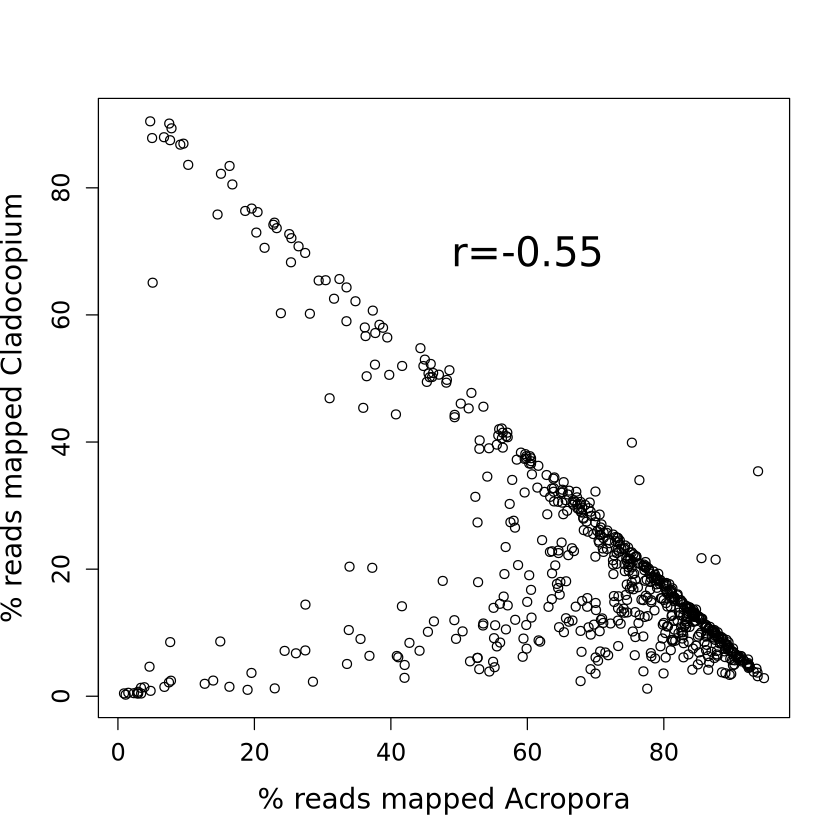

In [14]:
plot(map_join$acropora_reads,map_join$clad_reads,xlab="% reads mapped Acropora",ylab="% reads mapped Cladocopium",cex.lab=1.4,cex.axis=1.2)
text(60,70,"r=-0.55",cex=2)

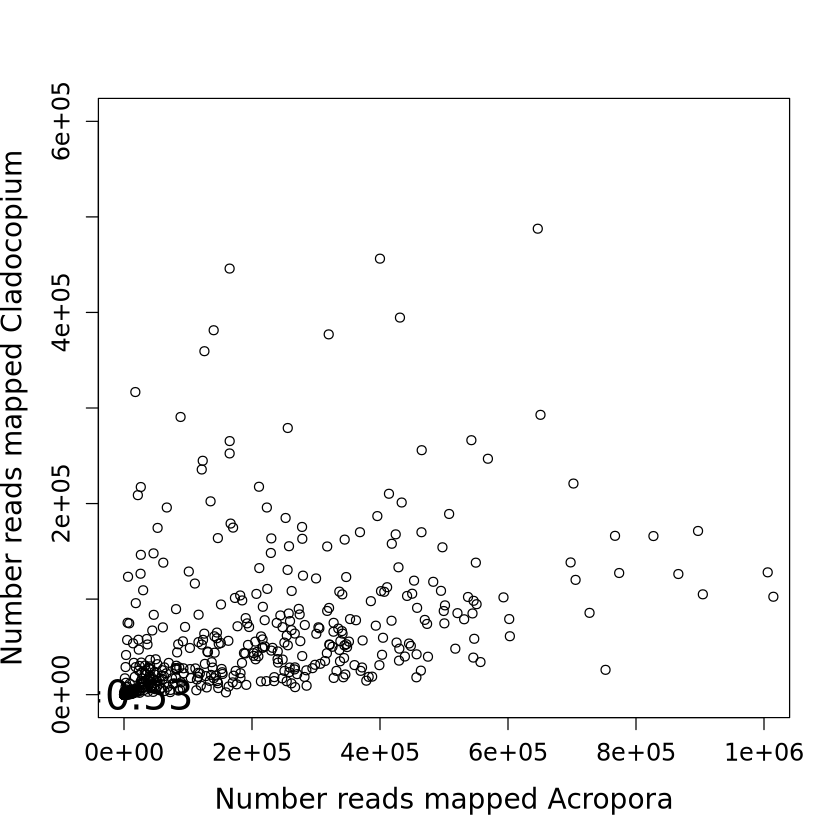

In [15]:
plot(map_join2$acropora_reads,map_join2$clad_reads,xlab="Number reads mapped Acropora",ylab="Number reads mapped Cladocopium",cex.lab=1.4,cex.axis=1.2,xlim=c(0,1000000),ylim=c(0,600000))
text(60,70,"r=0.53",cex=2)

In [16]:
summary(lm(clad_reads ~ acropora_reads, data=map_join))


Call:
lm(formula = clad_reads ~ acropora_reads, data = map_join)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.431  -4.908  -0.315   6.065  42.309 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    51.19061    1.90744   26.84   <2e-16 ***
acropora_reads -0.45077    0.02693  -16.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.91 on 650 degrees of freedom
Multiple R-squared:  0.3013,	Adjusted R-squared:  0.3002 
F-statistic: 280.3 on 1 and 650 DF,  p-value: < 2.2e-16


In [17]:
cor(map_join$acropora_reads,map_join$dur_reads)

[1] -0.3260007

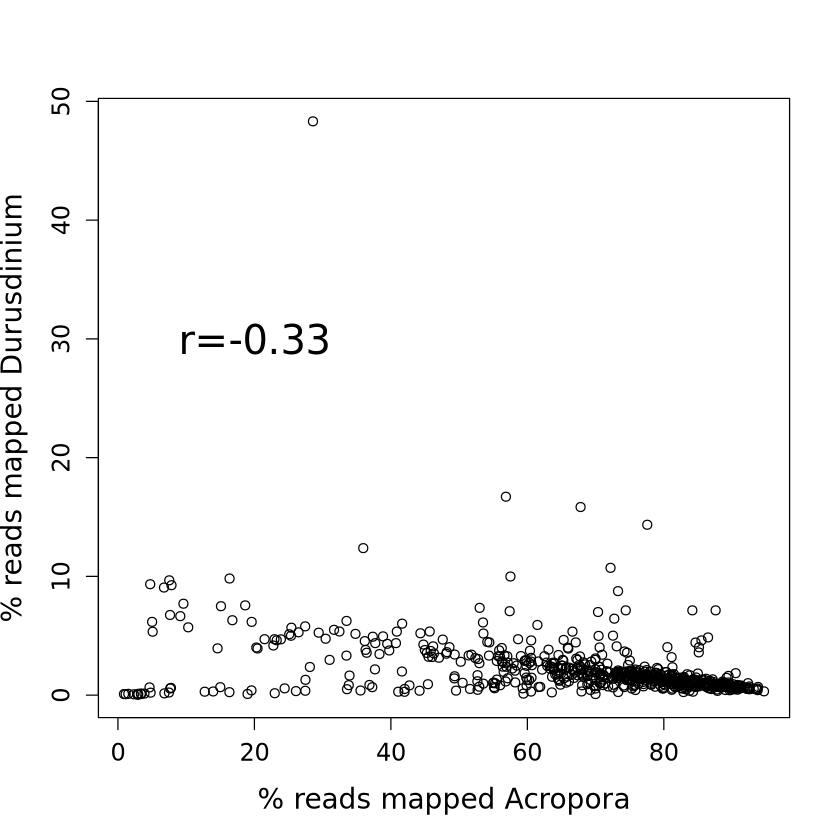

In [18]:
plot(map_join$acropora_reads,map_join$dur_reads,xlab="% reads mapped Acropora",ylab="% reads mapped Durusdinium",cex.lab=1.4,cex.axis=1.2)
text(20,30,"r=-0.33",cex=2)

In [19]:
dfa_grp1<-read_csv('taxa1_inds.csv',show_col_types = FALSE)
dfa_grp2<-read_csv('taxa2_inds.csv',show_col_types = FALSE)
dfa_grp3<-read_csv('taxa3_inds.csv',show_col_types = FALSE)
dfa_grp4<-read_csv('taxa4_inds.csv',show_col_types = FALSE)

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


In [20]:
symbionts$taxa[symbionts$IND %in% c(dfa_grp1[,2]$x)]<-1
symbionts$taxa[symbionts$IND %in% c(dfa_grp2[,2]$x)]<-2
symbionts$taxa[symbionts$IND %in% c(dfa_grp3[,2]$x)]<-3
symbionts$taxa[symbionts$IND %in% c(dfa_grp4[,2]$x)]<-4

In [21]:
symbionts<-full_join(symbionts,corals)

Joining with `by = join_by(IND)`


In [22]:
symbionts_filt <- symbionts[!is.na(symbionts$taxa),]
dominant_symbiont<-apply(symbionts_filt, MARGIN=1, FUN=max_frac)
table(dominant_symbiont)
symbionts_filt$max_frac<-dominant_symbiont

dominant_symbiont
clad_reads  dur_reads  sym_reads 
       322          3          1 

In [23]:
symbionts_filt[symbionts_filt$IND=='CEB20_T08',]

,IND,clad_reads,dur_reads,sym_reads,taxa,acropora_reads,max_frac
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
310,CEB20_T08,2.38,15.84,1.01,3,67.8,dur_reads


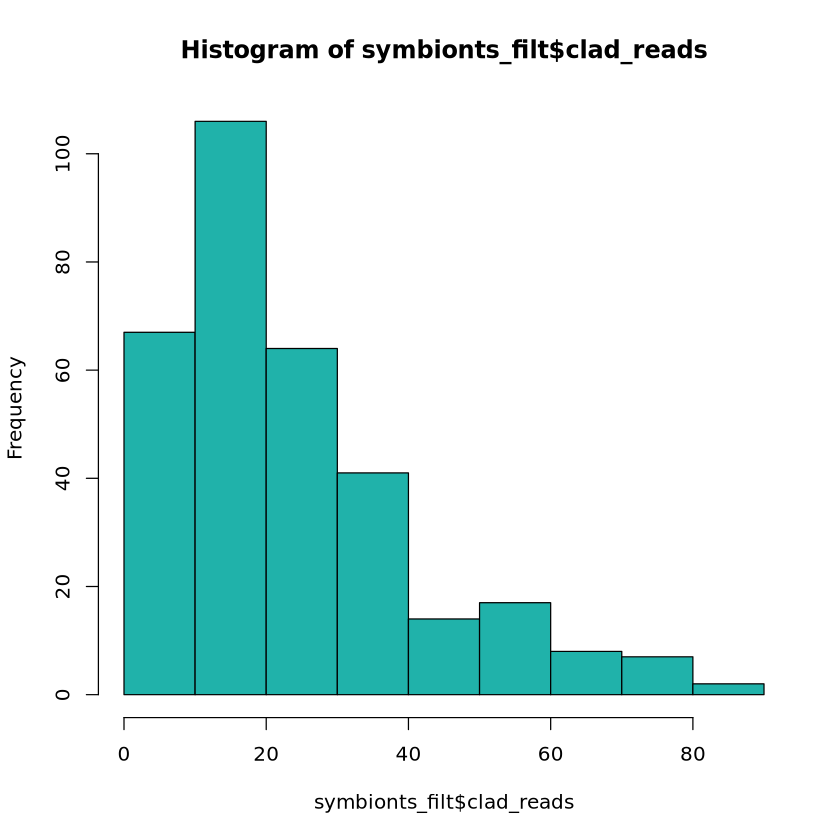

In [24]:
hist(symbionts_filt$clad_reads,col='lightseagreen')

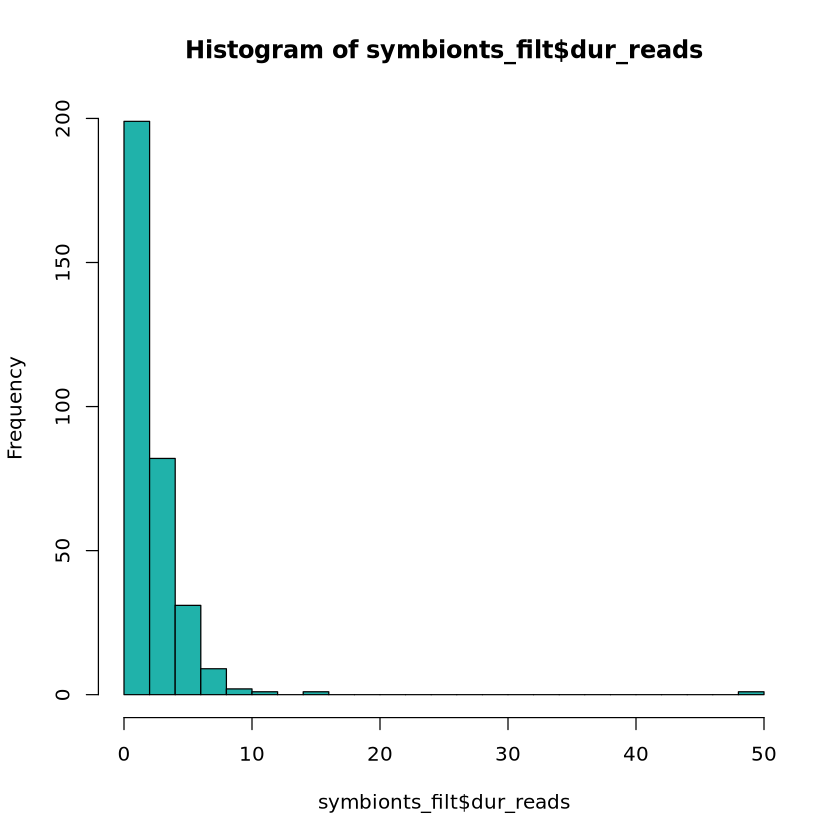

In [25]:
hist(symbionts_filt$dur_reads,col='lightseagreen',breaks=24)

In [26]:
#Make percentages datafram
symbiont_per<- as.data.frame(symbionts_filt[,1])
colnames(symbiont_per) <- 'ID'

In [27]:
symbiont_per$clad_per <- symbionts_filt$clad_reads/rowSums(symbionts_filt[,2:4])
symbiont_per$dur_per <- symbionts_filt$dur_reads/rowSums(symbionts_filt[,2:4])
symbiont_per$sym_per <- symbionts_filt$sym_reads/rowSums(symbionts_filt[,2:4])
symbiont_per$taxa <- symbionts_filt$taxa

In [28]:
summary(aov(clad_per ~ taxa, data=symbiont_per))
summary(aov(dur_per ~ taxa, data=symbiont_per))
summary(aov(sym_per ~ taxa, data=symbiont_per))

             Df Sum Sq  Mean Sq F value Pr(>F)
taxa          1 0.0092 0.009249   1.096  0.296
Residuals   324 2.7347 0.008440               

             Df Sum Sq  Mean Sq F value Pr(>F)
taxa          1 0.0003 0.000280   0.045  0.832
Residuals   324 2.0073 0.006195               

             Df Sum Sq  Mean Sq F value Pr(>F)
taxa          1 0.0063 0.006313   1.936  0.165
Residuals   324 1.0562 0.003260               

In [29]:
summary(aov(clad_reads ~ taxa, data=symbionts_filt))
summary(aov(dur_reads ~ taxa, data=symbionts_filt))
summary(aov(sym_reads ~ taxa, data=symbionts_filt))

             Df Sum Sq Mean Sq F value Pr(>F)
taxa          1    129   128.7   0.451  0.502
Residuals   324  92410   285.2               

             Df Sum Sq Mean Sq F value Pr(>F)
taxa          1      2   1.580   0.161  0.688
Residuals   324   3174   9.798               

             Df Sum Sq Mean Sq F value Pr(>F)
taxa          1    0.5   0.469   0.072  0.789
Residuals   324 2121.0   6.546               

In [30]:
table(symbionts_filt$max_frac,symbionts_filt$taxa)

            
               1   2   3   4
  clad_reads 121  73  59  69
  dur_reads    2   0   1   0
  sym_reads    1   0   0   0

In [31]:
kruskal.test(clad_per ~ taxa, data=symbiont_per)
kruskal.test(dur_per ~ taxa, data=symbiont_per)
kruskal.test(sym_per ~ taxa, data=symbiont_per)


	Kruskal-Wallis rank sum test

data:  clad_per by taxa
Kruskal-Wallis chi-squared = 5.4468, df = 3, p-value = 0.1419



	Kruskal-Wallis rank sum test

data:  dur_per by taxa
Kruskal-Wallis chi-squared = 18.982, df = 3, p-value = 0.0002757



	Kruskal-Wallis rank sum test

data:  sym_per by taxa
Kruskal-Wallis chi-squared = 0.15166, df = 3, p-value = 0.985


In [32]:
kruskal.test(clad_reads ~ taxa, data=symbionts_filt)
kruskal.test(dur_reads ~ taxa, data=symbionts_filt)
kruskal.test(sym_reads ~ taxa, data=symbionts_filt)


	Kruskal-Wallis rank sum test

data:  clad_reads by taxa
Kruskal-Wallis chi-squared = 20.264, df = 3, p-value = 0.0001496



	Kruskal-Wallis rank sum test

data:  dur_reads by taxa
Kruskal-Wallis chi-squared = 8.9661, df = 3, p-value = 0.02975



	Kruskal-Wallis rank sum test

data:  sym_reads by taxa
Kruskal-Wallis chi-squared = 14.912, df = 3, p-value = 0.001894


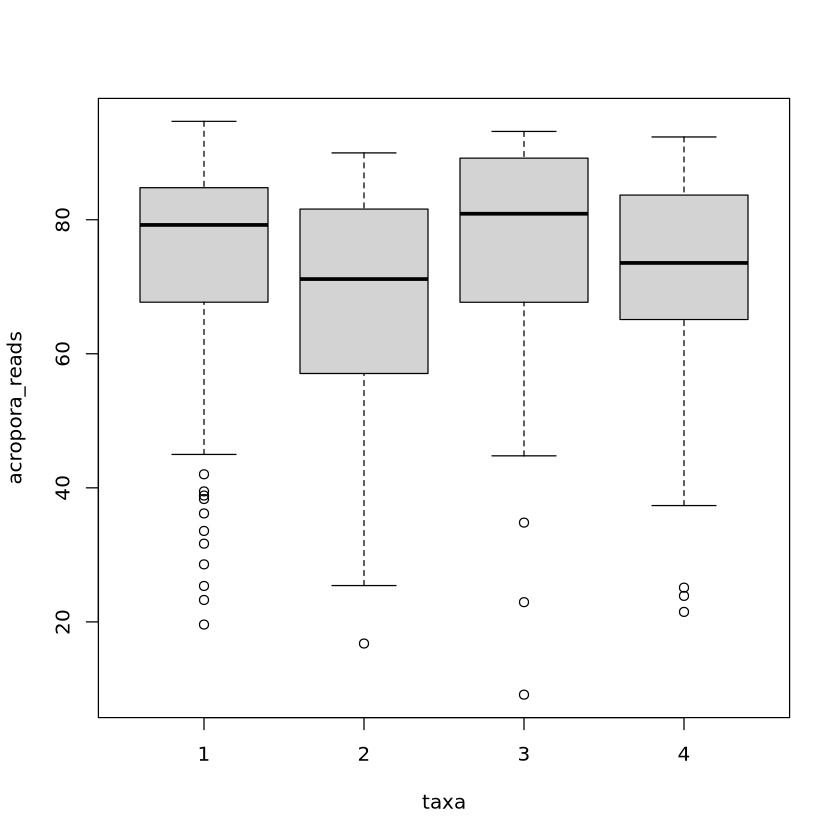

In [33]:
boxplot(acropora_reads ~ taxa, data=symbionts_filt)

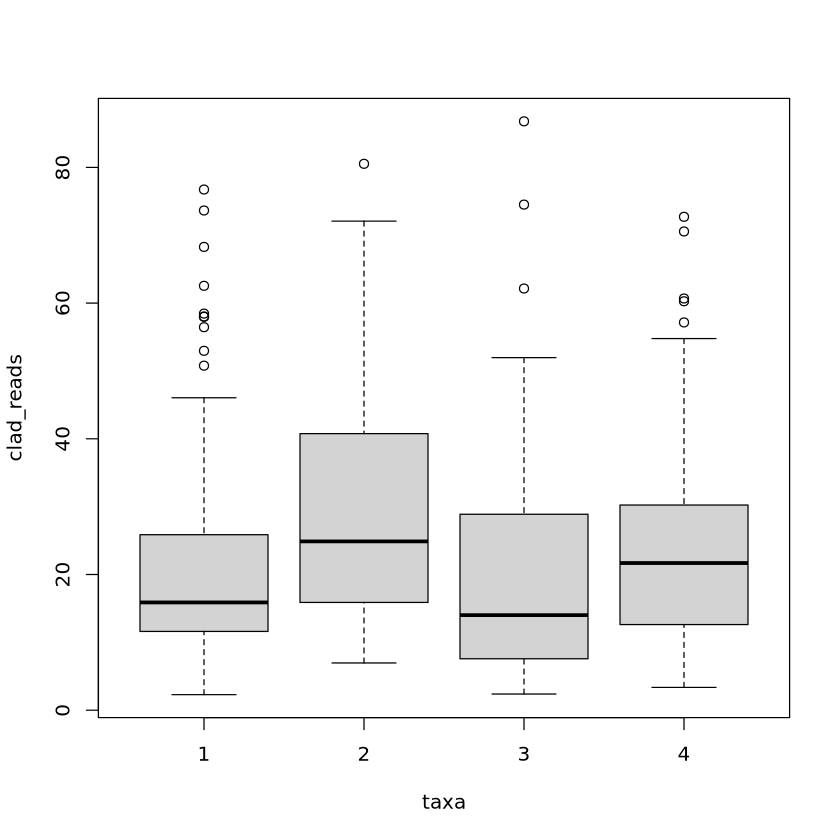

In [34]:
boxplot(clad_reads ~ taxa, data=symbionts_filt)

In [44]:
colnames(symbiont_per)

[1] "ID"       "clad_per" "dur_per"  "sym_per"  "taxa"

In [47]:
s<- symbiont_per
colnames(s)<-c('IND','Cladocopium','Durusdinium','Symbiodinium','taxa')
symb_long<-pivot_longer(s,cols=c('Cladocopium','Durusdinium','Symbiodinium'),names_to='Symbiont_genus',values_to='reads')

In [52]:
png("symbiont genus boxplot.png", width=10, height=5, units = "in", res = 300)
boxplot(reads ~ Symbiont_genus,data=symb_long,xlab="Symbiont genus",ylab="% of symbiont reads mapped",cex.lab=1.5,cex.axis=1.1,axes=TRUE,frame.plot=FALSE)
dev.off()

pdf 
  2

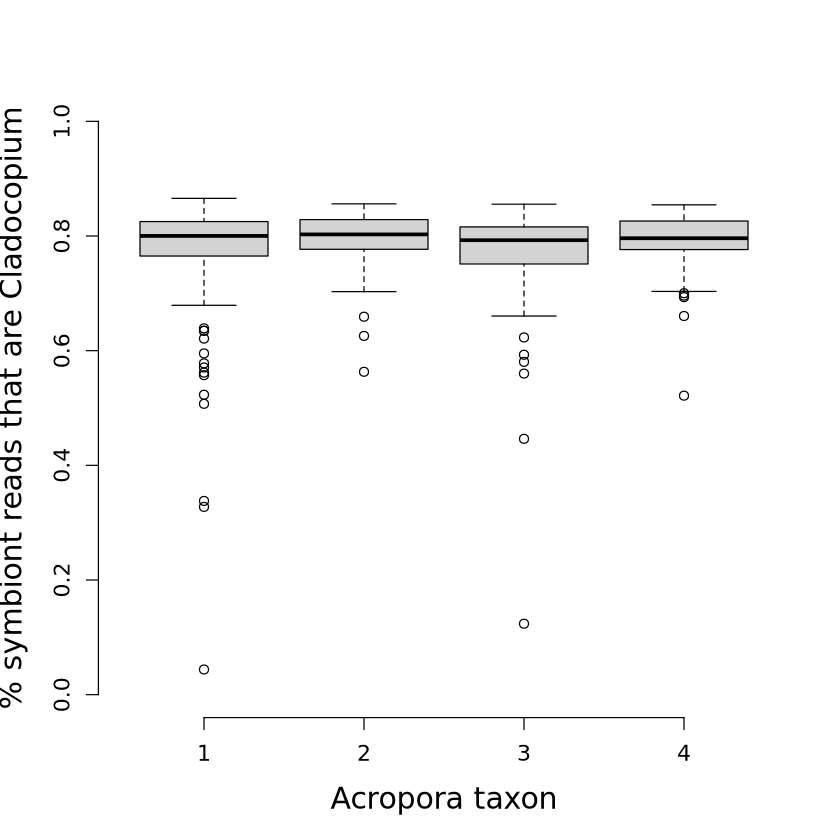

In [65]:
boxplot(clad_per ~ taxa, data=symbiont_per,xlab="Acropora taxon",ylab="% symbiont reads that are Cladocopium",cex.lab=1.5,cex.axis=1.1,ylim=c(0,1),axes=TRUE,frame.plot=FALSE)

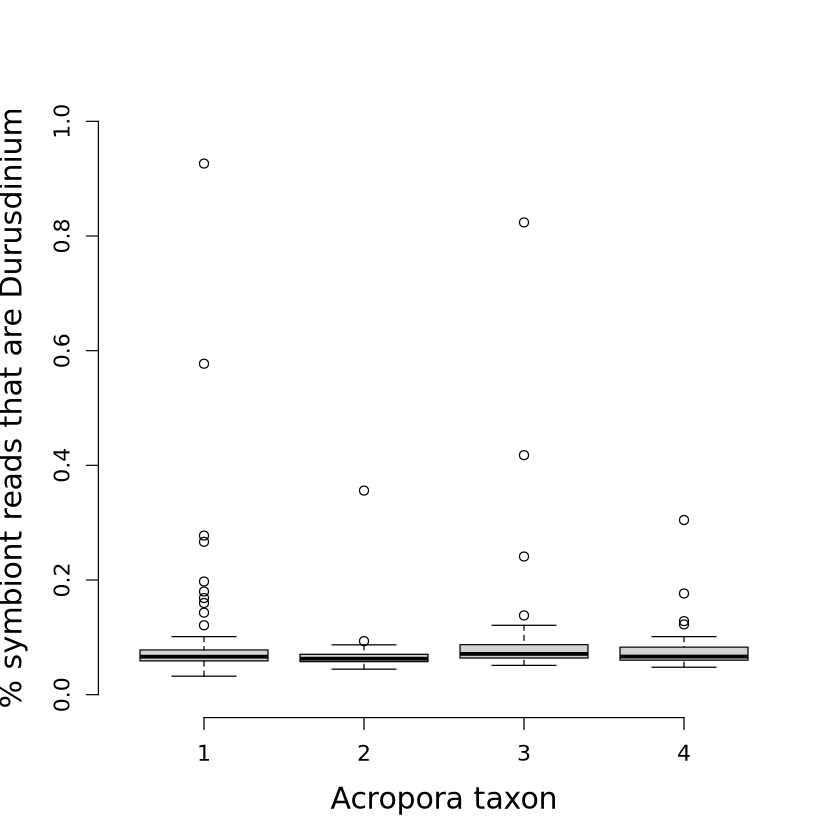

In [66]:
boxplot(dur_per ~ taxa, data=symbiont_per,xlab="Acropora taxon",ylab="% symbiont reads that are Durusdinium",cex.lab=1.5,cex.axis=1.1,ylim=c(0,1),axes=TRUE,frame.plot=FALSE)

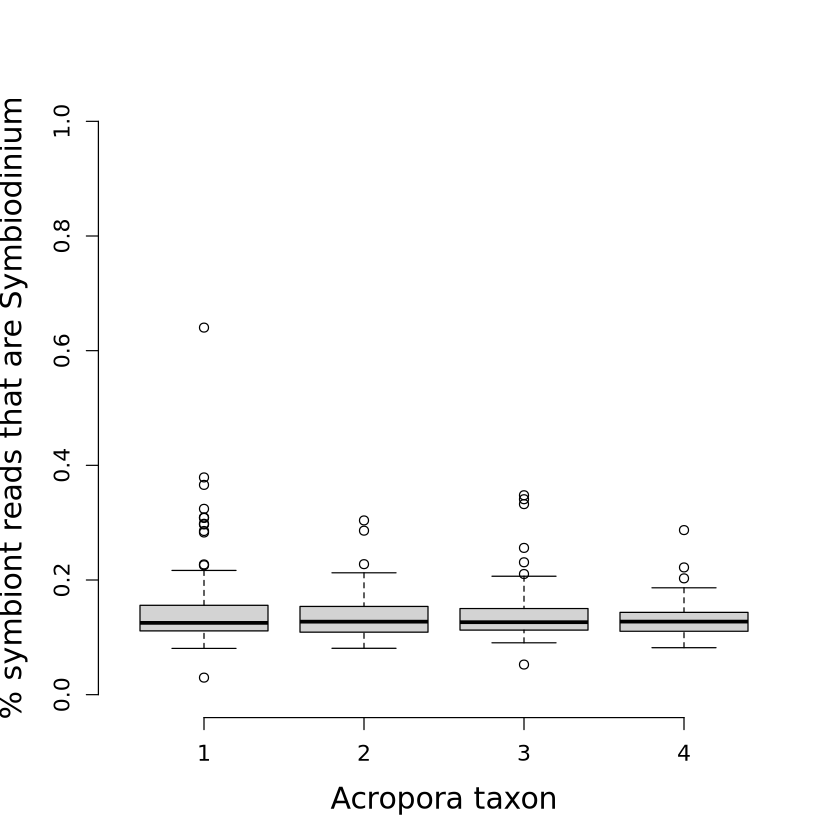

In [67]:
boxplot(sym_per ~ taxa, data=symbiont_per,xlab="Acropora taxon",ylab="% symbiont reads that are Symbiodinium",cex.lab=1.5,cex.axis=1.1,ylim=c(0,1),axes=TRUE,frame.plot=FALSE)

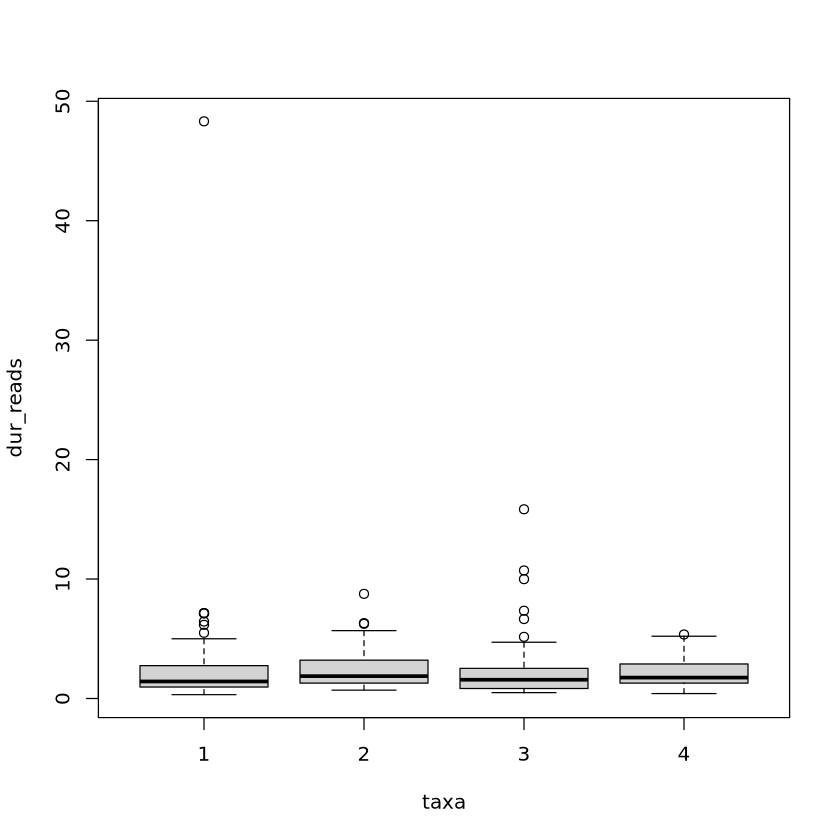

In [68]:
boxplot(dur_reads ~ taxa, data=symbionts)

In [40]:
kruskal.test(acropora_reads ~ taxa, data=symbionts)


	Kruskal-Wallis rank sum test

data:  acropora_reads by taxa
Kruskal-Wallis chi-squared = 14.895, df = 3, p-value = 0.001909


In [69]:
aggregate(dur_per ~ taxa,data=symbiont_per,FUN=mean)
aggregate(dur_per ~ taxa,data=symbiont_per,FUN=median)
aggregate(dur_per ~ taxa,data=symbiont_per,FUN=max)

taxa,dur_per
<dbl>,<dbl>
1,0.08609300
2,0.06831344
3,0.09667301
4,0.07679631


taxa,dur_per
<dbl>,<dbl>
1,0.06620718
2,0.06272023
3,0.07109812
4,0.06643757


taxa,dur_per
<dbl>,<dbl>
1,0.9263804
2,0.3559529
3,0.8237129
4,0.3046107


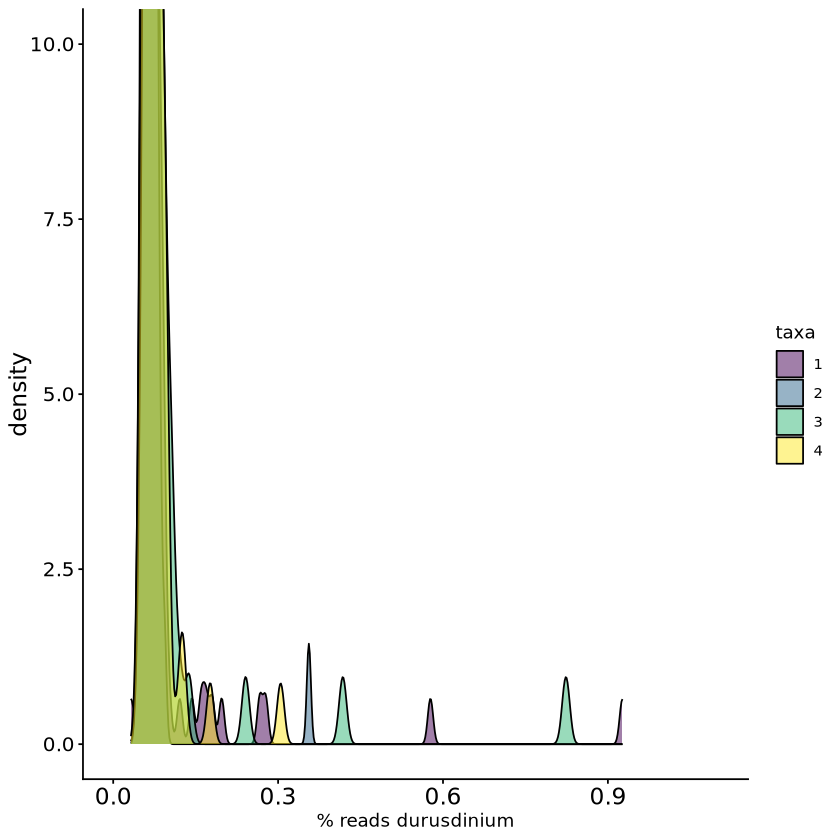

In [70]:
symbiont_per$taxa<-as.factor(symbiont_per$taxa)
plot_colors <- c("#440154FF", "#31688EFF", "#35B779FF", "#FDE725FF")
durusdinium_density<-ggplot(symbiont_per, aes(x = dur_per, fill = taxa)) +
  geom_density(alpha=0.5) +
  coord_cartesian(xlim = c(0, 1.1),ylim=c(0,10)) +
  scale_fill_manual(values = plot_colors) +
  theme_classic() +
  labs(x = "% reads durusdinium",x="Density")+
  theme(plot.title = element_text(size = 18),
      axis.title.y = element_text(size = 14),
      axis.text.x = element_text(size = 14),
      axis.text.y = element_text(size = 12))
durusdinium_density

In [71]:
#Import metadata
metadat<-read.csv('metadata_shoredist.csv')
metadat$ID<-metadat$Sample_ID

In [72]:
at_depth<-metadat[!is.na(metadat$Depth_ft),]

In [77]:
symbiont_per$max_frac<-apply(symbionts_filt, MARGIN=1, FUN=max_frac)

In [78]:
symb_depth<-inner_join(at_depth,symbiont_per)

Joining with `by = join_by(ID)`


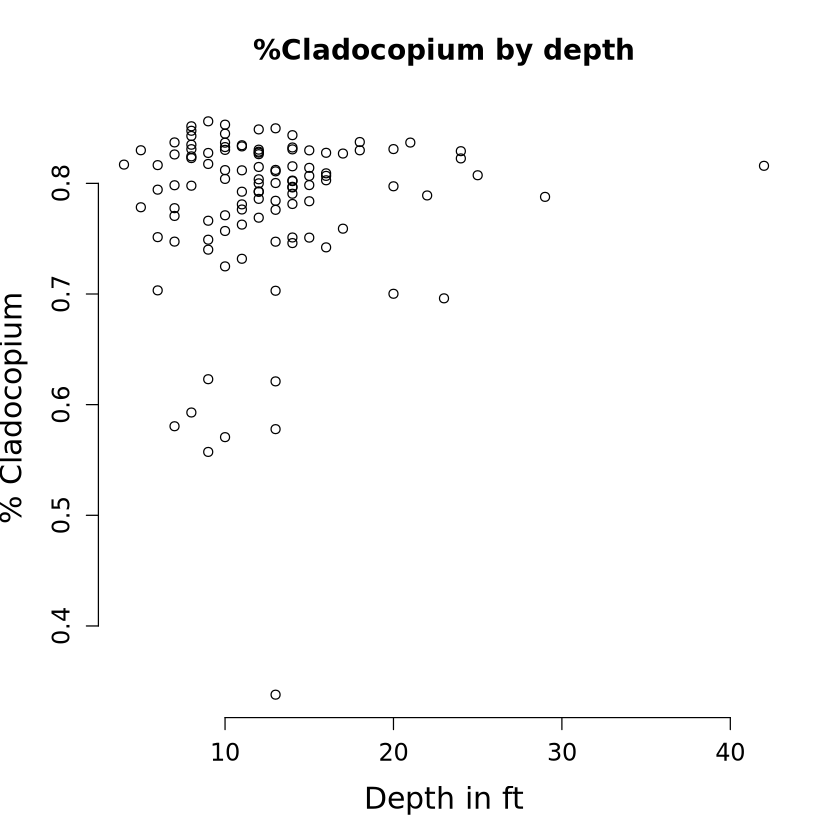

In [79]:
plot(symb_depth$Depth_ft,symb_depth$clad_per,main="%Cladocopium by depth",cex.lab=1.5,cex.axis=1.2,axes=TRUE,frame.plot=FALSE,xlab="Depth in ft",ylab="% Cladocopium",cex.main=1.4)

In [95]:
colnames(symb_depth)

[1] "X"            "Unnamed..0"   "Sample_ID"    "Time"         "Day"         
 [6] "Month"        "Year"         "Depth_ft"     "Unnamed..6"   "Unnamed..7"  
[11] "hour"         "minute"       "dt"           "lat"          "lon"         
[16] "name"         "DisplayColor" "Distance"     "ele"          "time"        
[21] "SHOREDIST"    "ID"           "clad_per"     "dur_per"      "sym_per"     
[26] "taxa"         "max_frac"

In [97]:
kruskal.test(Depth_ft ~ max_frac, data=symb_depth)
kruskal.test(SHOREDIST ~ max_frac, data=symb_depth)


	Kruskal-Wallis rank sum test

data:  Depth_ft by max_frac
Kruskal-Wallis chi-squared = 0.14114, df = 1, p-value = 0.7071



	Kruskal-Wallis rank sum test

data:  SHOREDIST by max_frac
Kruskal-Wallis chi-squared = 2.2516, df = 1, p-value = 0.1335


In [94]:
summary(lm(sym_per ~ Depth_ft,data=symb_depth))
cor(symb_depth$sym_per,symb_depth$Depth_ft)


Call:
lm(formula = sym_per ~ Depth_ft, data = symb_depth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058394 -0.032693 -0.014297  0.007461  0.226613 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1528218  0.0130309  11.728   <2e-16 ***
Depth_ft    -0.0010413  0.0009548  -1.091    0.278    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05375 on 109 degrees of freedom
Multiple R-squared:  0.01079,	Adjusted R-squared:  0.001719 
F-statistic: 1.189 on 1 and 109 DF,  p-value: 0.2779


[1] -0.1038952

In [90]:
summary(lm(clad_per ~ Depth_ft,data=symb_depth))
cor(symb_depth$clad_per,symb_depth$Depth_ft)


Call:
lm(formula = clad_per ~ Depth_ft, data = symb_depth)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44489 -0.01216  0.01863  0.04545  0.07747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.769042   0.018411  41.771   <2e-16 ***
Depth_ft    0.001059   0.001349   0.785    0.434    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07594 on 109 degrees of freedom
Multiple R-squared:  0.00562,	Adjusted R-squared:  -0.003503 
F-statistic: 0.616 on 1 and 109 DF,  p-value: 0.4342


[1] 0.07496552

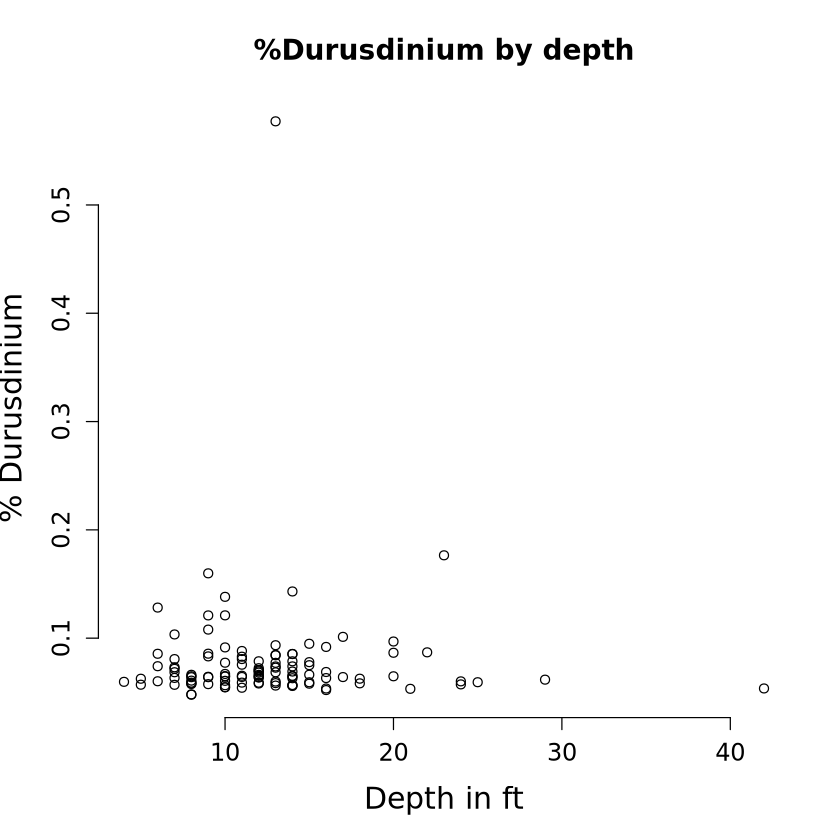

In [121]:
plot(symb_depth$Depth_ft,symb_depth$dur_per,main="%Durusdinium by depth",cex.lab=1.5,cex.axis=1.2,axes=TRUE,frame.plot=FALSE,xlab="Depth in ft",ylab="% Durusdinium",cex.main=1.4)

In [91]:
summary(lm(dur_per ~ Depth_ft,data=symb_depth))
cor(symb_depth$dur,symb_depth$Depth_ft)


Call:
lm(formula = dur_per ~ Depth_ft, data = symb_depth)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03017 -0.01850 -0.01264  0.00272  0.49929 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0781363  0.0128286   6.091 1.72e-08 ***
Depth_ft    -0.0000175  0.0009400  -0.019    0.985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05292 on 109 degrees of freedom
Multiple R-squared:  3.18e-06,	Adjusted R-squared:  -0.009171 
F-statistic: 0.0003466 on 1 and 109 DF,  p-value: 0.9852


[1] -0.0017832

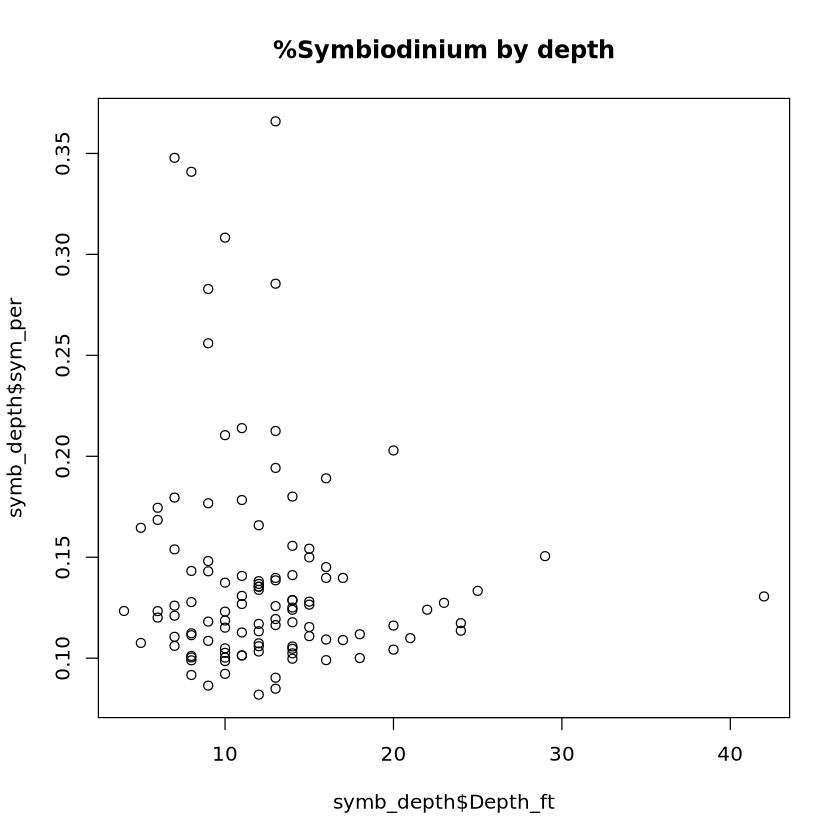

In [88]:
plot(symb_depth$Depth_ft,symb_depth$sym_per,main="%Symbiodinium by depth")

In [92]:
summary(lm(Depth_ft ~ clad_per+ dur_per+ sym_per,data=symb_depth))


Call:
lm(formula = Depth_ft ~ clad_per + dur_per + sym_per, data = symb_depth)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7288 -3.1132 -0.7902  1.9058 29.3456 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)    3.644      8.277   0.440    0.661
clad_per      10.366      9.550   1.085    0.280
dur_per       10.331     13.744   0.752    0.454
sym_per           NA         NA      NA       NA

Residual standard error: 5.388 on 108 degrees of freedom
Multiple R-squared:  0.01079,	Adjusted R-squared:  -0.007524 
F-statistic: 0.5893 on 2 and 108 DF,  p-value: 0.5565


In [39]:
symb_meta<-inner_join(metadat,symbiont_per)

Joining with `by = join_by(ID)`


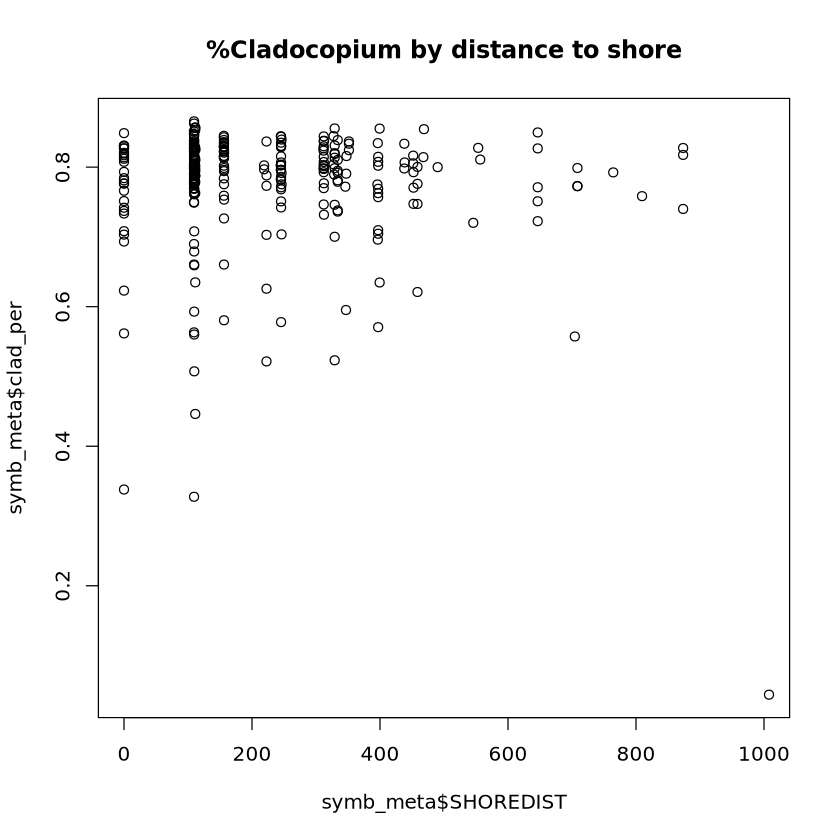

In [43]:
plot(symb_meta$SHOREDIST,symb_meta$clad_per,main="%Cladocopium by distance to shore",xlim=c(0,1000))

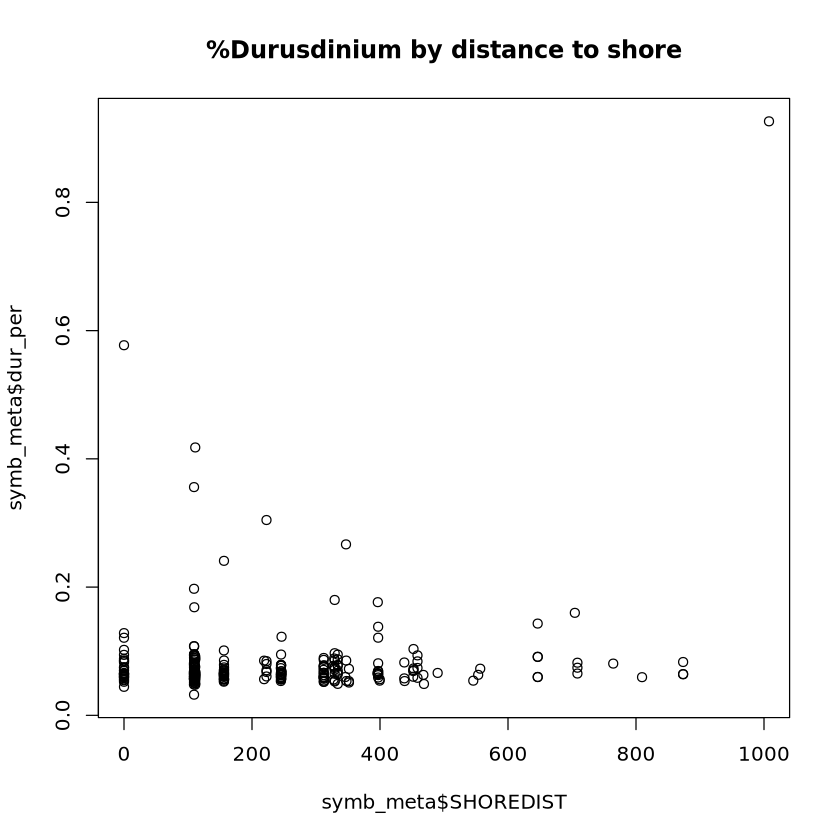

In [41]:
plot(symb_meta$SHOREDIST,symb_meta$dur_per,main="%Durusdinium by distance to shore",xlim=c(0,1000))

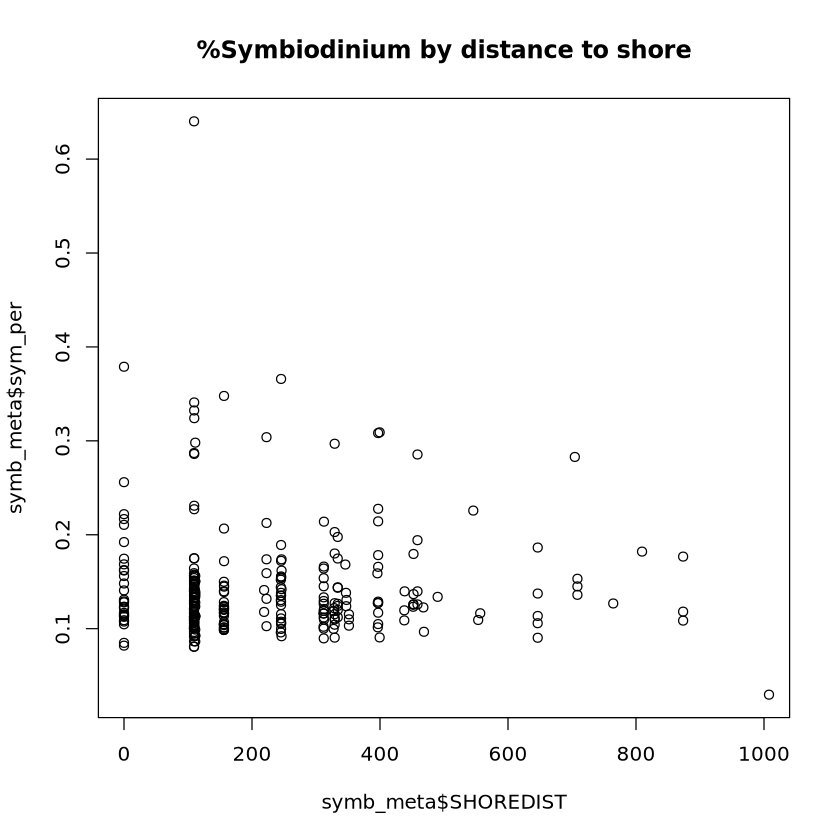

In [44]:
plot(symb_meta$SHOREDIST,symb_meta$sym_per,main="%Symbiodinium by distance to shore",xlim=c(0,1000))

In [45]:
summary(lm(SHOREDIST ~ clad_per+ sym_per + dur_per,data=symb_meta))


Call:
lm(formula = SHOREDIST ~ clad_per + sym_per + dur_per, data = symb_meta)

Residuals:
   Min     1Q Median     3Q    Max 
-13974  -3130  -2943  -2598  47880 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    16162       7780   2.077   0.0386 *
clad_per      -12868       8447  -1.523   0.1287  
sym_per       -20722      13589  -1.525   0.1283  
dur_per           NA         NA      NA       NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11770 on 307 degrees of freedom
Multiple R-squared:  0.009798,	Adjusted R-squared:  0.003348 
F-statistic: 1.519 on 2 and 307 DF,  p-value: 0.2206


In [46]:
high_dur <- symb_meta[symb_meta$dur_per>0.2,]
high_sym <- symb_meta[symb_meta$sym_per>0.2,]

In [52]:
colnames(high_dur)

[1] "X"            "Unnamed..0"   "Sample_ID"    "Time"         "Day"         
 [6] "Month"        "Year"         "Depth_ft"     "Unnamed..6"   "Unnamed..7"  
[11] "hour"         "minute"       "dt"           "lat"          "lon"         
[16] "name"         "DisplayColor" "Distance"     "ele"          "time"        
[21] "SHOREDIST"    "ID"           "clad_per"     "dur_per"      "sym_per"     
[26] "taxa"

In [54]:
high_dur$Sample_ID
high_dur$dur_per

[1] "CEB13_T09" "CEB20_T08" "CEB19_T08" "CEB19_T10" "CEB02_T04" "LEY02_T02"
[7] "LEY05_T13" "CEB35_T15"

[1] 0.2666169 0.8237129 0.2409551 0.4177708 0.9263804 0.5772029 0.3559529
[8] 0.3046107

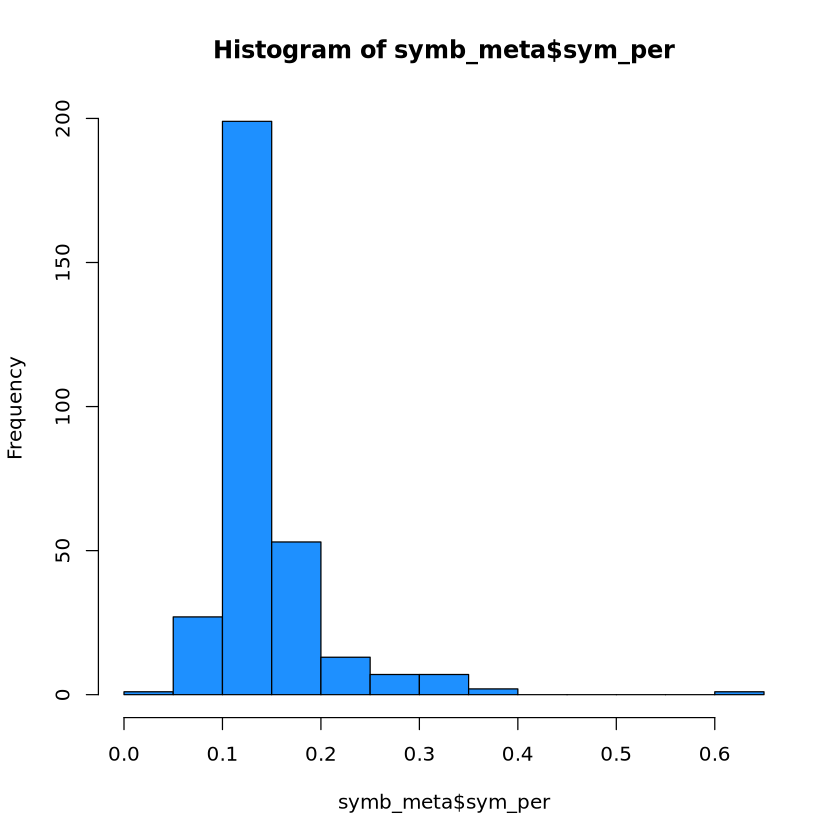

In [48]:
hist(symb_meta$sym_per,breaks=16,col='dodgerblue')

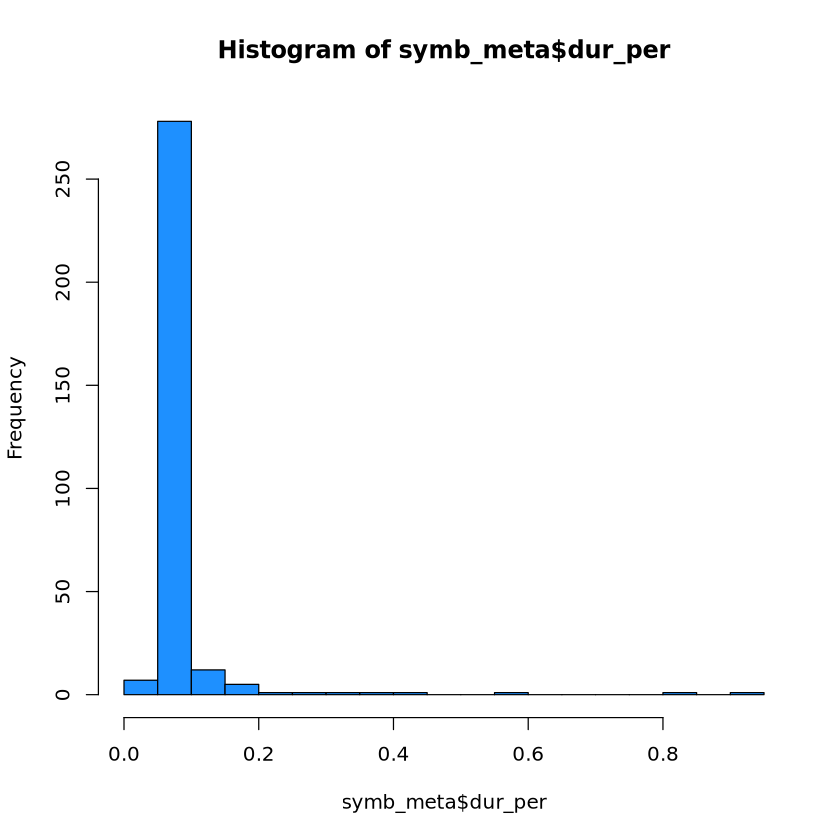

In [49]:
hist(symb_meta$dur_per,breaks=16,col='dodgerblue')

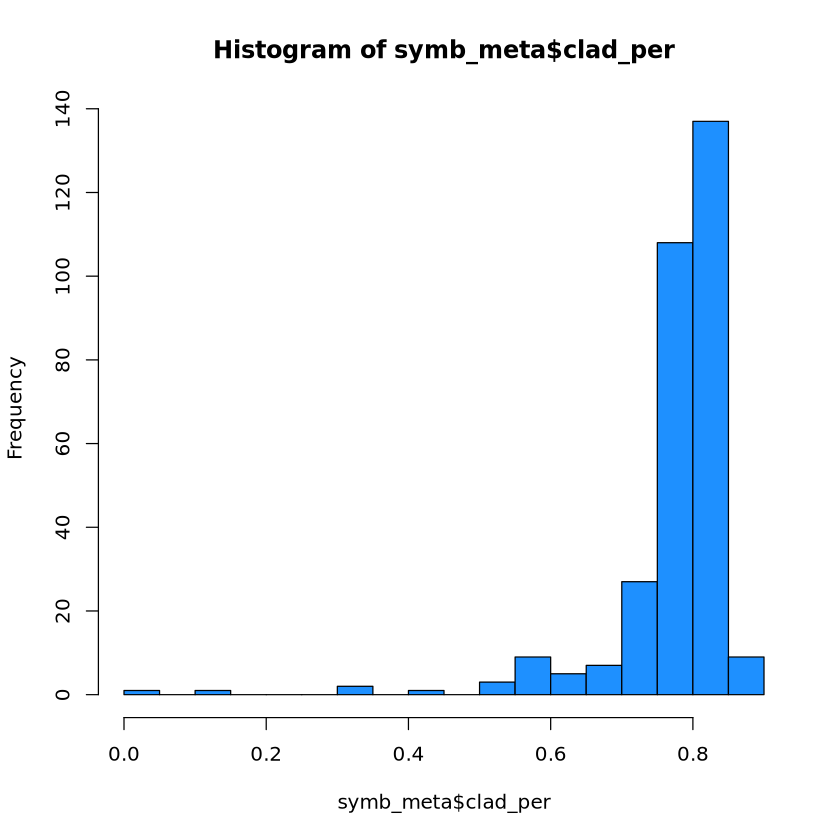

In [50]:
hist(symb_meta$clad_per,breaks=16,col='dodgerblue')

In [125]:
vcf<-read.vcfR("/hb/scratch/jbos/cladocopium/snps_filtered_depth.recode.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 6905
  header_line: 6906
  variant count: 5301
  column count: 293
Meta line 6905 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 5301
  Character matrix gt cols: 293
  skip: 0
  nrows: 5301
  row_num: 0
Processed variant: 5301
All variants processed


In [126]:
genind0 <- vcfR2genind(vcf)

Loading required namespace: adegenet



In [130]:
symbionts_partial<-symbionts[symbionts$IND %in% rownames(genind0@tab),]

In [135]:
genind0@pop<-as.factor(symbionts_partial$taxa)

In [162]:
removals<-rownames(genind0@tab)[is.na(genind0@pop)]

In [163]:
removals

[1] "LEY13_T04" "CEB16_T16" "CEB09_T14" "LEY15_T15" "CEB08_T10" "CEB27_T15"
 [7] "CEB04_T09" "CEB11_T16" "CEB18_T17" "CEB03_T12" "CEB20_T07" "LEY04_T01"

In [164]:
genind0<-genind0[!row.names(genind0@tab) %in% removals]

In [166]:
hstat0<-genind2hierfstat(genind0,pop=genind0@pop)

In [ ]:
fsts<-pairwise.WCfst(hstat0)

In [ ]:
write.csv(fsts,'cladocopium_fsts_AT_taxa.csv',row.names=TRUE)